In [7]:
%%capture
%run ../ICON/read_icon2TE_model_3D.ipynb
%run ../confg

In [8]:
%%capture    
import warnings

import xarray as xr

import metpy
import metpy.calc as mpcalc
import numpy as np
import pandas as pd
import wrf
from matplotlib import pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
from netCDF4 import Dataset

warnings.filterwarnings("ignore")

In [9]:
# Specify the launch date and time
launch_date = pd.to_datetime('2017-10-16 02:15:05',
                             format='%Y-%m-%d %H:%M:%S')

time_for_model = pd.to_datetime('2017-10-16 03:00:00',
                                format='%Y-%m-%d %H:%M:%S')  # TODO can change here the time

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


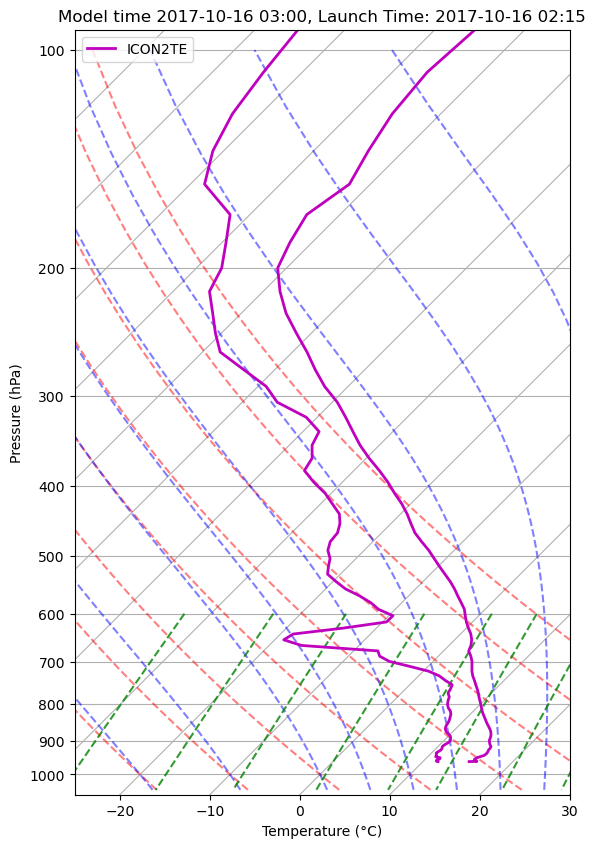

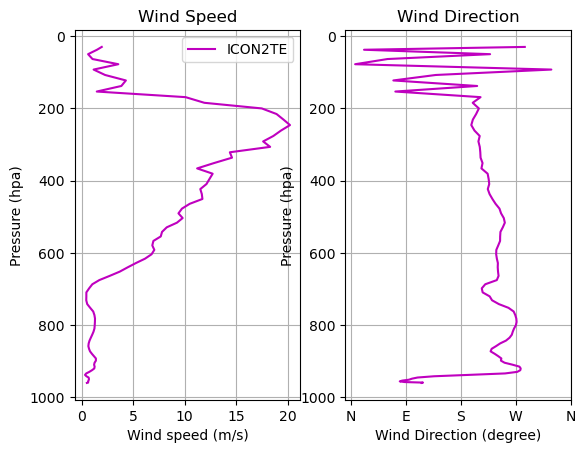

In [10]:
#changed thing: temperature-273.15

df_icon2TE = read_icon2TE_fixed_point_and_time(day=16, hour=3, my_lon=station_files_zamg["LOWI"]["lon"],
                                             my_lat=station_files_zamg["LOWI"]["lat"])



fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45, rect=(0.1, 0.1, 0.55, 0.85))
skew.plot(df_icon2TE["pressure"].values, df_icon2TE["temp"].values-273.15, color='m', label="ICON2TE",
              linewidth=2)
skew.plot(df_icon2TE["pressure"].values, df_icon2TE["dewpoint"].values, color='m', linewidth=2)

# Change to adjust data limits and give it a semblance of what we want
skew.ax.set_adjustable('datalim')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.title(
    f"Model time {pd.to_datetime(time_for_model).strftime('%Y-%m-%d %H:%M')}, Launch Time: {pd.to_datetime(launch_date).strftime('%Y-%m-%d %H:%M')}")

skew.ax.set_xlabel('Temperature (°C)')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlim(-25, 30)
skew.ax.set_ylim(1000, 100)

plt.legend()

plt.savefig(dir_PLOTS + "icon2TE_radiosounding.png")


fig, axarr = plt.subplots(nrows=1, ncols=2)
axlist = axarr.flatten()

ff_icon2TE = mpcalc.wind_speed(df_icon2TE["u"], df_icon2TE["v"])
dd_icon2TE = mpcalc.wind_direction(df_icon2TE["u"], df_icon2TE["v"])


axlist[0].plot(ff_icon2TE, df_icon2TE["pressure"], label="ICON2TE", color='m')


axlist[0].invert_yaxis()
# ax.set_yscale('log')
axlist[0].set_ylabel("Pressure (hpa)")
axlist[0].set_xlabel("Wind speed (m/s)")
axlist[0].set_title("Wind Speed")
axlist[0].legend()
axlist[0].grid(True)


axlist[1].plot(dd_icon2TE, df_icon2TE["pressure"], label="ICON2TE", color='m')

axlist[1].invert_yaxis()
# ax.set_yscale('log')
axlist[1].set_ylabel("Pressure (hpa)")
axlist[1].set_xlabel("Wind Direction (degree)")
axlist[1].set_title("Wind Direction")
axlist[1].grid(True)
xticks = np.arange(0, 361, 90)
xtick_labels = ['N', 'E', 'S', 'W', 'N']
axlist[1].set_xticks(xticks)
axlist[1].set_xticklabels(xtick_labels)

  
plt.savefig(dir_PLOTS + "icon2TE_winds.png")

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


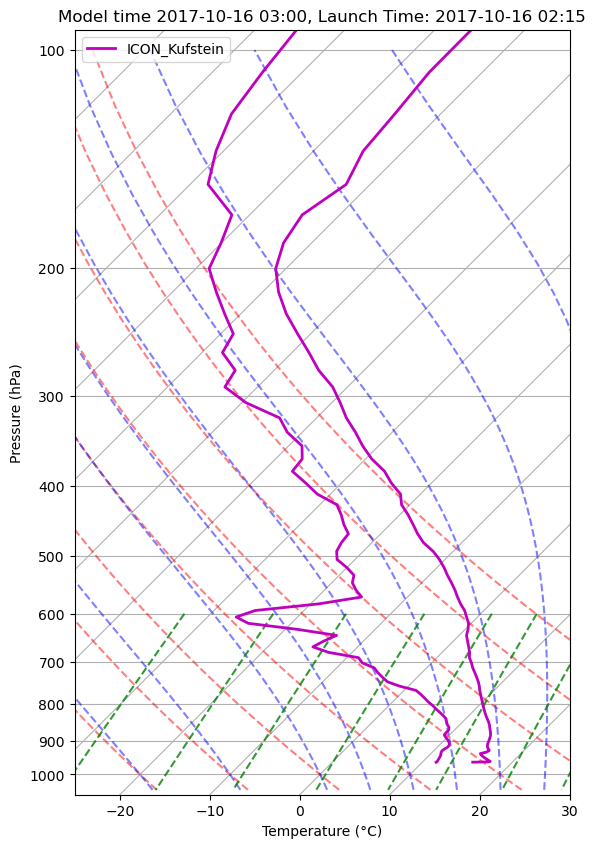

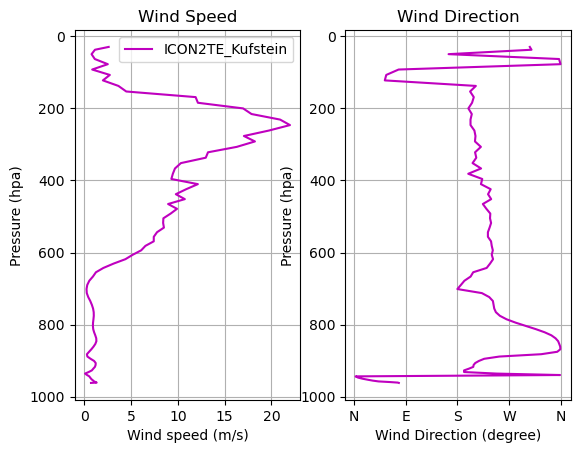

In [11]:
df_icon2TE_kufstein = read_icon2TE_fixed_point_and_time(day=16, hour=3, my_lon=station_files_zamg["KUF"]["lon"],
                                             my_lat=station_files_zamg["KUF"]["lat"])



fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45, rect=(0.1, 0.1, 0.55, 0.85))
skew.plot(df_icon2TE_kufstein["pressure"].values, df_icon2TE_kufstein["temp"].values-273.15, color='m', label="ICON_Kufstein",
              linewidth=2)
skew.plot(df_icon2TE_kufstein["pressure"].values, df_icon2TE_kufstein["dewpoint"].values, color='m', linewidth=2)

# Change to adjust data limits and give it a semblance of what we want
skew.ax.set_adjustable('datalim')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.title(
    f"Model time {pd.to_datetime(time_for_model).strftime('%Y-%m-%d %H:%M')}, Launch Time: {pd.to_datetime(launch_date).strftime('%Y-%m-%d %H:%M')}")

skew.ax.set_xlabel('Temperature (°C)')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlim(-25, 30)
skew.ax.set_ylim(1000, 100)

plt.legend()

plt.savefig(dir_PLOTS + "icon2TE_radiosounding_Kufstein.png")


fig, axarr = plt.subplots(nrows=1, ncols=2)
axlist = axarr.flatten()

ff_icon2TE = mpcalc.wind_speed(df_icon2TE_kufstein["u"], df_icon2TE_kufstein["v"])
dd_icon2TE = mpcalc.wind_direction(df_icon2TE_kufstein["u"], df_icon2TE_kufstein["v"])


axlist[0].plot(ff_icon2TE, df_icon2TE_kufstein["pressure"], label="ICON2TE_Kufstein", color='m')


axlist[0].invert_yaxis()
# ax.set_yscale('log')
axlist[0].set_ylabel("Pressure (hpa)")
axlist[0].set_xlabel("Wind speed (m/s)")
axlist[0].set_title("Wind Speed")
axlist[0].legend()
axlist[0].grid(True)


axlist[1].plot(dd_icon2TE, df_icon2TE_kufstein["pressure"], label="ICON2TE_Kufstein", color='m')

axlist[1].invert_yaxis()
# ax.set_yscale('log')
axlist[1].set_ylabel("Pressure (hpa)")
axlist[1].set_xlabel("Wind Direction (degree)")
axlist[1].set_title("Wind Direction")
axlist[1].grid(True)
xticks = np.arange(0, 361, 90)
xtick_labels = ['N', 'E', 'S', 'W', 'N']
axlist[1].set_xticks(xticks)
axlist[1].set_xticklabels(xtick_labels)

  
plt.savefig(dir_PLOTS + "icon2TE_winds_Kufstein.png")

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


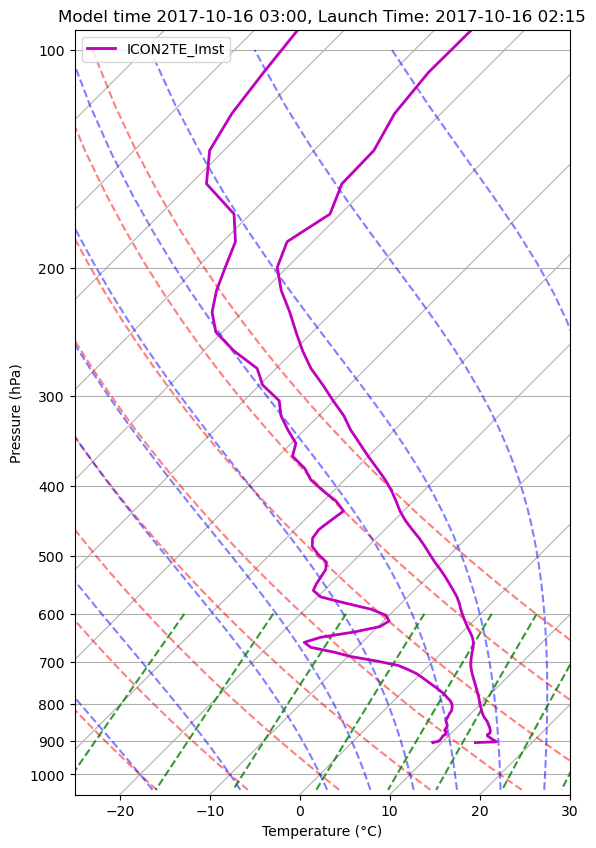

In [ ]:
df_icon2TE_imst = read_icon2TE_fixed_point_and_time(day=16, hour=3, my_lon=station_files_zamg["IMST"]["lon"],
                                             my_lat=station_files_zamg["IMST"]["lat"])



fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45, rect=(0.1, 0.1, 0.55, 0.85))
skew.plot(df_icon2TE_imst["pressure"].values, df_icon2TE_imst["temp"].values-273.15, color='m', label="ICON2TE_Imst",
              linewidth=2)
skew.plot(df_icon2TE_imst["pressure"].values, df_icon2TE_imst["dewpoint"].values, color='m', linewidth=2)

# Change to adjust data limits and give it a semblance of what we want
skew.ax.set_adjustable('datalim')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.title(
    f"Model time {pd.to_datetime(time_for_model).strftime('%Y-%m-%d %H:%M')}, Launch Time: {pd.to_datetime(launch_date).strftime('%Y-%m-%d %H:%M')}")

skew.ax.set_xlabel('Temperature (°C)')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlim(-25, 30)
skew.ax.set_ylim(1000, 100)

plt.legend()

plt.savefig(dir_PLOTS + "icon2TE_radiosounding_Imst.png")


fig, axarr = plt.subplots(nrows=1, ncols=2)
axlist = axarr.flatten()

ff_icon2TE = mpcalc.wind_speed(df_icon2TE_imst["u"], df_icon2TE_imst["v"])
dd_icon2TE = mpcalc.wind_direction(df_icon2TE_imst["u"], df_icon2TE_imst["v"])


axlist[0].plot(ff_icon2TE, df_icon2TE_imst["pressure"], label="ICON2TE_Imst", color='m')


axlist[0].invert_yaxis()
# ax.set_yscale('log')
axlist[0].set_ylabel("Pressure (hpa)")
axlist[0].set_xlabel("Wind speed (m/s)")
axlist[0].set_title("Wind Speed")
axlist[0].legend()
axlist[0].grid(True)


axlist[1].plot(dd_icon2TE, df_icon2TE_imst["pressure"], label="ICON2TE_Imst", color='m')

axlist[1].invert_yaxis()
# ax.set_yscale('log')
axlist[1].set_ylabel("Pressure (hpa)")
axlist[1].set_xlabel("Wind Direction (degree)")
axlist[1].set_title("Wind Direction")
axlist[1].grid(True)
xticks = np.arange(0, 361, 90)
xtick_labels = ['N', 'E', 'S', 'W', 'N']
axlist[1].set_xticks(xticks)
axlist[1].set_xticklabels(xtick_labels)

  
plt.savefig(dir_PLOTS + "icon2TE_winds_Imst.png")